## Iris Dataset Exploration

This section explores the Iris dataset using descriptive statistics and visualizations.

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Dataset statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


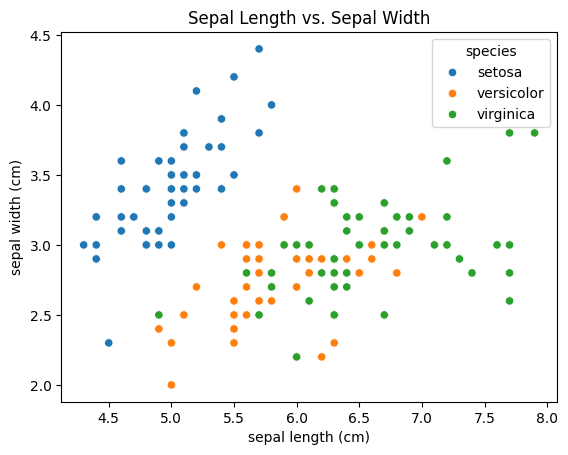

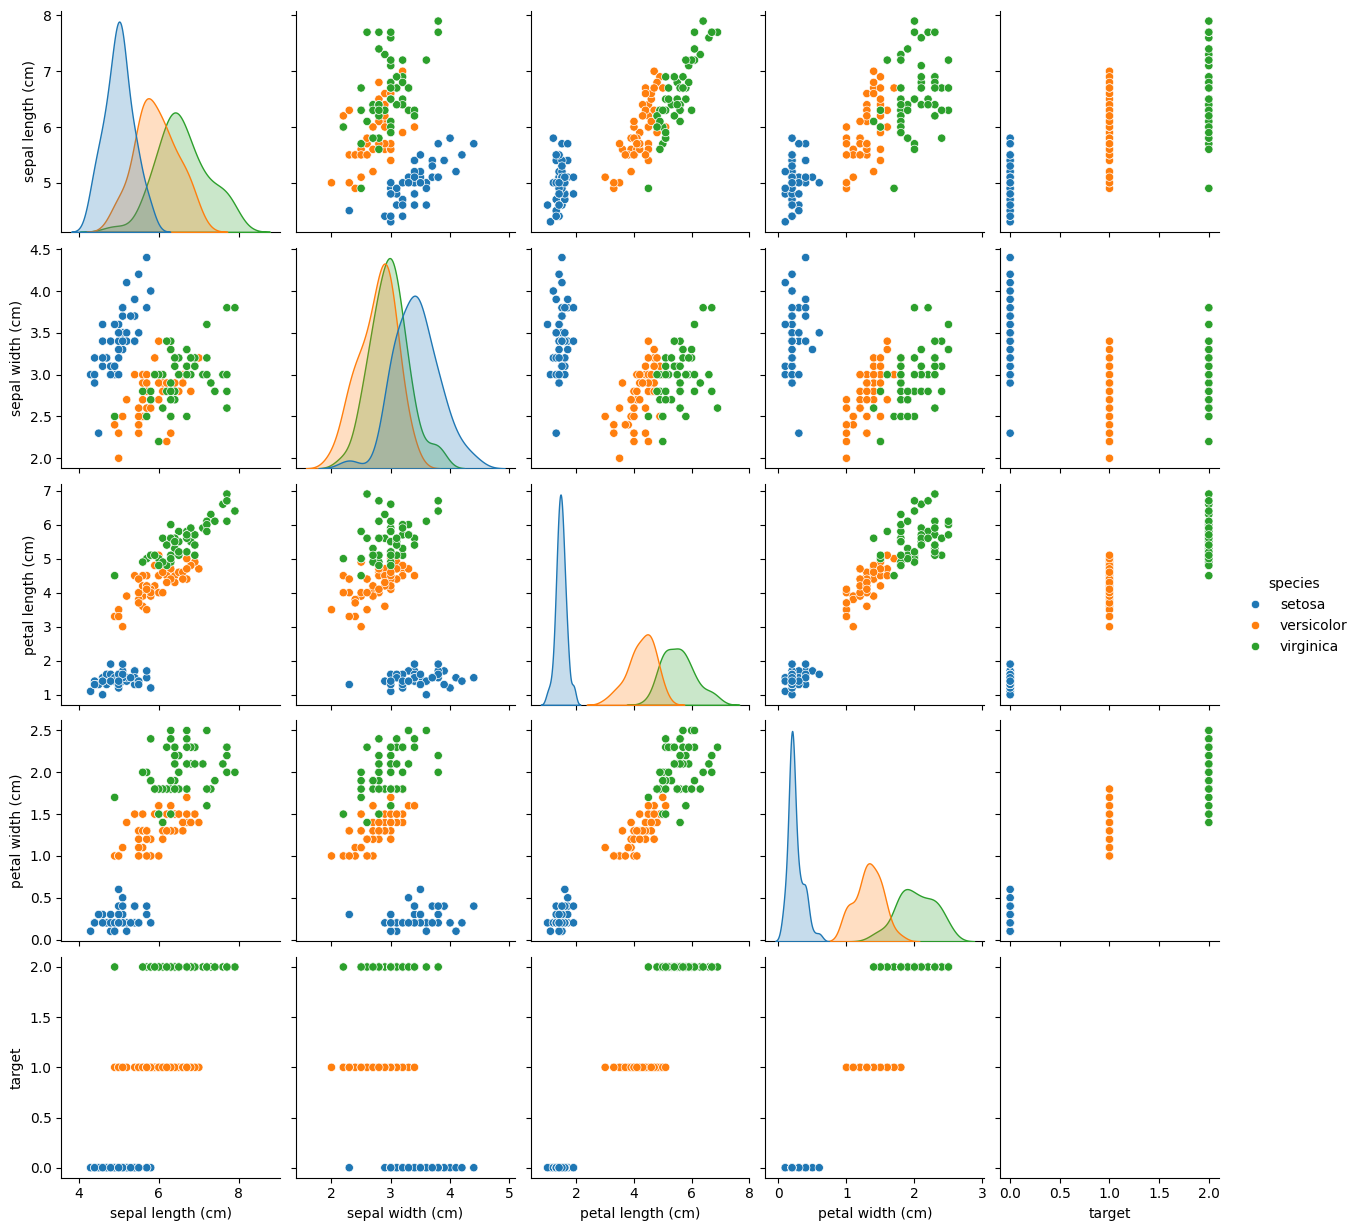

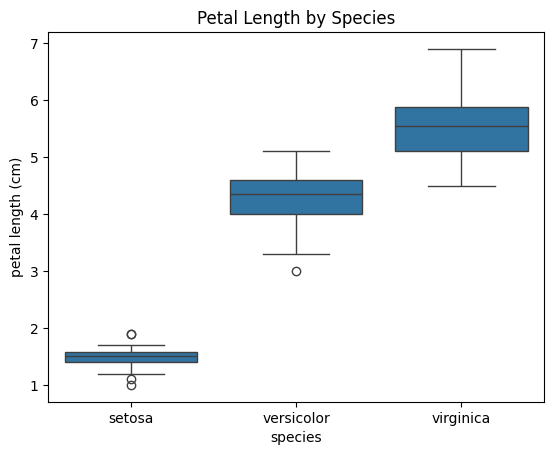

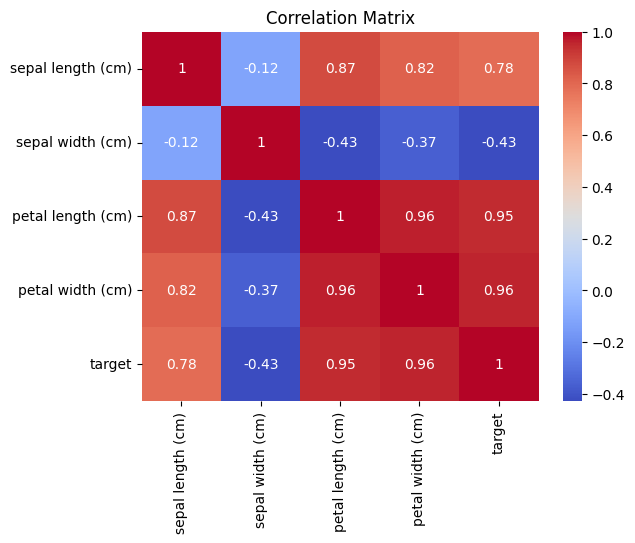

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Basic data exploration
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset statistics:")
display(df.describe())

# Visualizations
# Scatter plot of sepal length vs. sepal width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# Pair plot of all features
sns.pairplot(df, hue='species')
plt.show()

# Box plot of petal length by species
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')
plt.show()

# Correlation matrix
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Exclude 'species' column

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Further analysis (e.g., machine learning models) can be added here

## Statistical Analysis of Petal Counts

This section performs statistical analysis on petal length and petal width, including distributions and comparisons between species.


Distribution of Petal Length:
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64


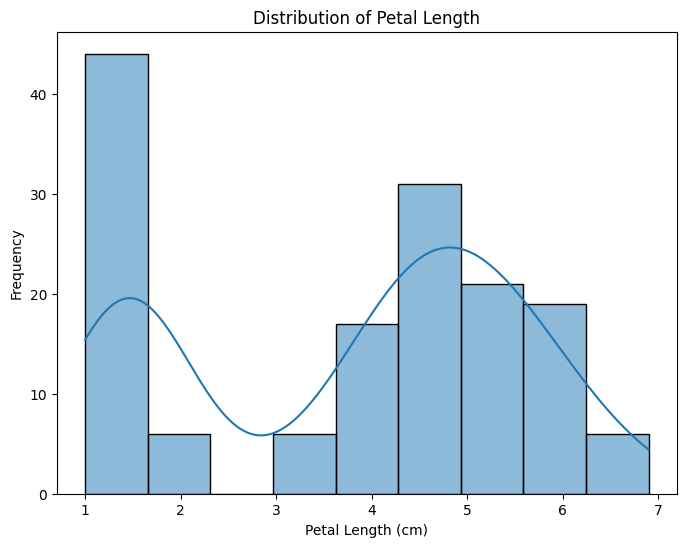


Distribution of Petal Width:
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64


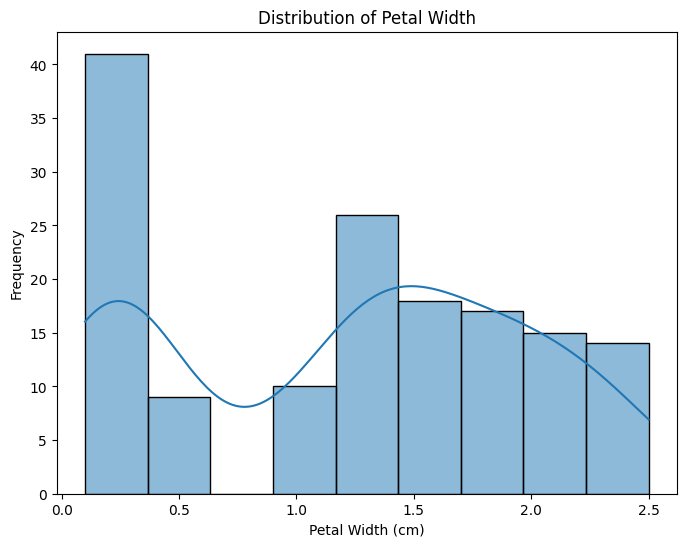

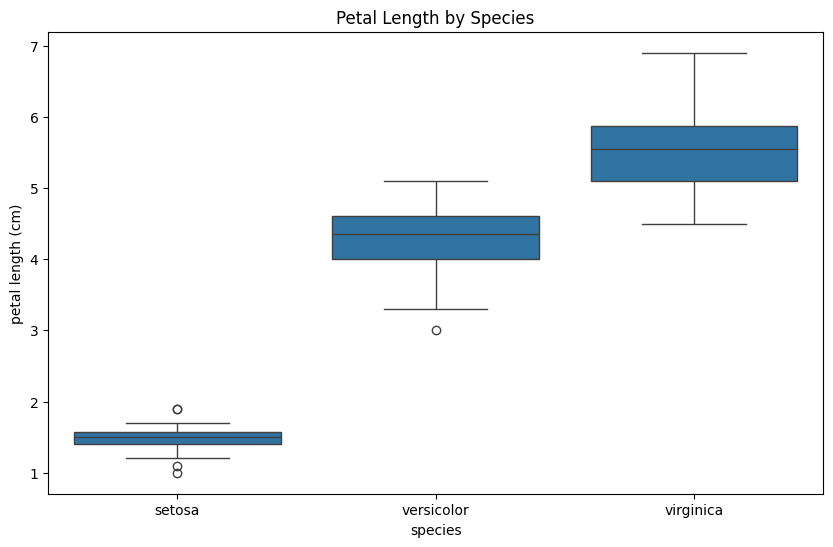

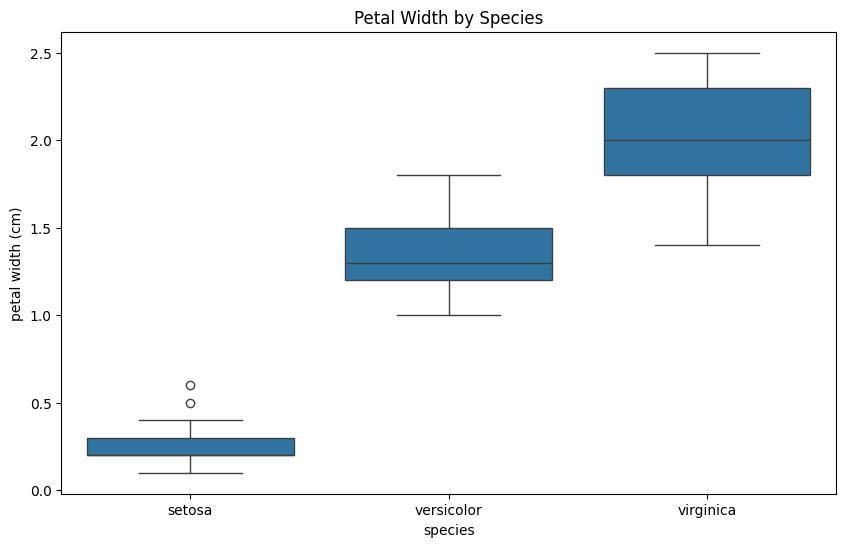

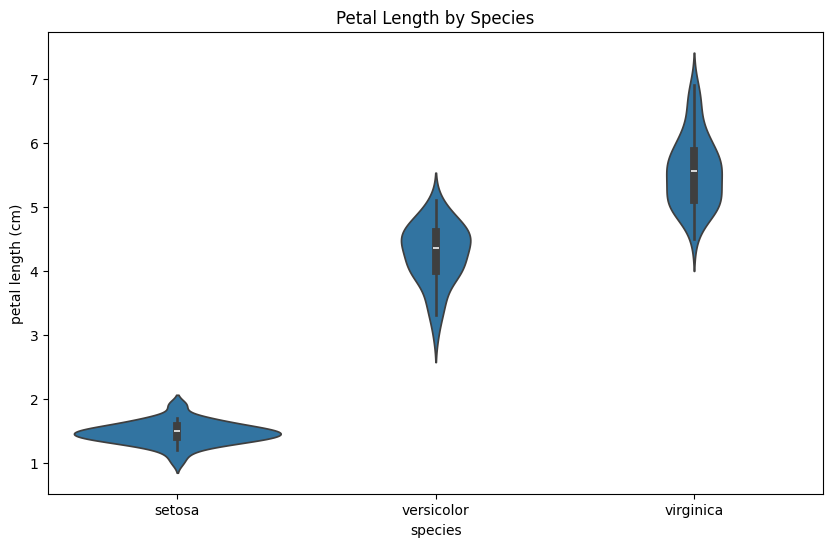

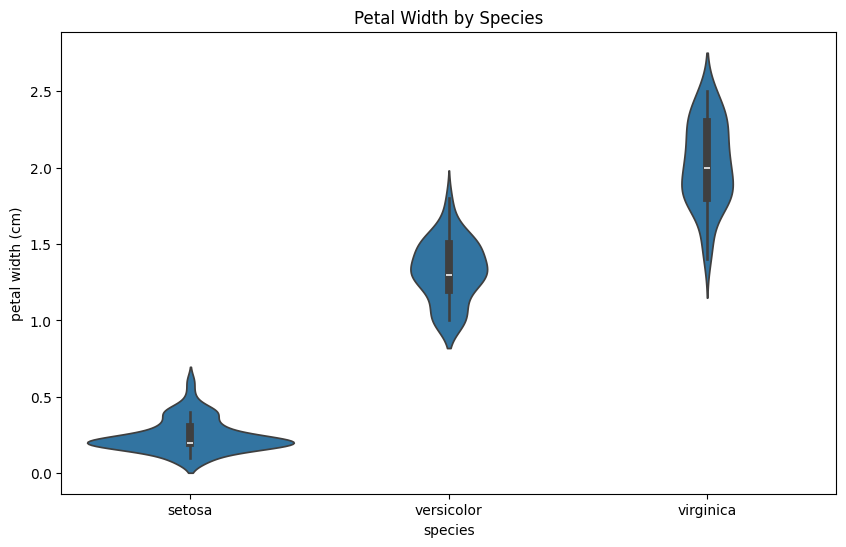


Mean, Median and Standard Deviation of Petal Length and Width by Species:


petal length (cm)                  petal width (cm)         \
                        mean median       std             mean median   
species                                                                 
setosa                 1.462   1.50  0.173664            0.246    0.2   
versicolor             4.260   4.35  0.469911            1.326    1.3   
virginica              5.552   5.55  0.551895            2.026    2.0   

                      
                 std  
species               
setosa      0.105386  
versicolor  0.197753  
virginica   0.274650

In [2]:
import matplotlib.pyplot as plt
# Statistical analysis of petal counts (petal length and petal width)

# Distribution of petal length
print("\nDistribution of Petal Length:")
print(df['petal length (cm)'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['petal length (cm)'], kde=True)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Distribution of petal width
print("\nDistribution of Petal Width:")
print(df['petal width (cm)'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['petal width (cm)'], kde=True)
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# Box plots for petal length and width by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Petal Width by Species')
plt.show()

# Violin plots for petal length and width by species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal width (cm)', data=df)
plt.title('Petal Width by Species')
plt.show()

# Calculate the mean petal length and width for each species
petal_stats = df.groupby('species')[['petal length (cm)', 'petal width (cm)']].agg(['mean', 'median', 'std'])
print("\nMean, Median and Standard Deviation of Petal Length and Width by Species:")
petal_stats


## Flower Type Prediction Model

This section builds a prediction model to predict the flower type (species) based on given parameters.

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:


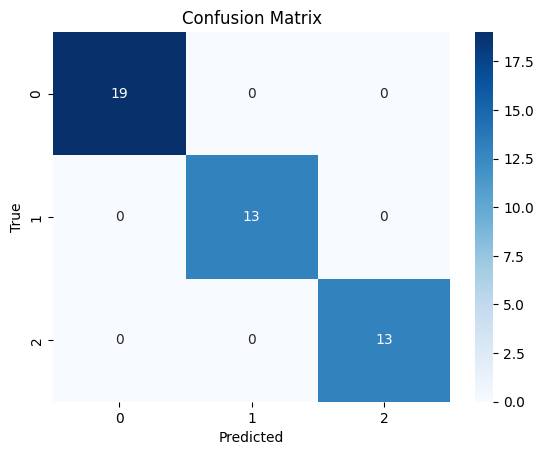

In [3]:
# prompt: Okay, let's build a prediction model to predict the flower type (species) based on  a random dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = df.drop(['target', 'species'], axis=1)  # Features
y = df['species']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Conclusions

In this notebook, we explored the Iris dataset, performed statistical analysis on petal measurements, and built a prediction model for flower type.

**Key Findings:**

* The Iris dataset contains information about three species of iris flowers: setosa, versicolor, and virginica.
* Petal length and width are important features for distinguishing between the species.
* The Logistic Regression model achieved high accuracy in predicting flower type based on sepal and petal measurements.

**Further Exploration:**

* Explore other classification models, such as K-Nearest Neighbors or Support Vector Machines.
* Investigate feature engineering techniques to potentially improve model performance.
* Apply the prediction model to new, unseen data to evaluate its generalization ability.

This analysis provides a foundation for further investigation and understanding of the Iris dataset and its potential for flower type prediction.